In [ ]:
from google.colab import files

import warnings
warnings.filterwarnings("ignore")

In [ ]:
uploaded = files.upload()

Saving telco.csv to telco.csv


# **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe(include='object').transpose()

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [ ]:
exclude_columns = ['customerID']
object_columns = df.select_dtypes(include='object').drop(exclude_columns, axis=1)

for column in object_columns.columns:
    unique_classes = df[column].value_counts()
    print(f"{column}")
    print(unique_classes)
    print("\n")

gender
Male      3555
Female    3488
Name: gender, dtype: int64


Partner
No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


TechSupport
No                     3473
Yes                    2044
No internet servi

In [ ]:
ambiguous_columns = ['OnlineSecurity', 'OnlineBackup', 'MultipleLines', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a mapping dictionary
replacement_mapping = {
    'No phone service': 'No',
    'No internet service': 'No'}

# Apply the mapping to the ambiguous columns
for column in ambiguous_columns:
    df[column] = df[column].replace(replacement_mapping)

In [ ]:
object_columns = df.select_dtypes(include='object').drop(exclude_columns, axis=1)

for column in object_columns.columns:
    unique_classes = df[column].value_counts()
    print(f"{column}")
    print(unique_classes)
    print("\n")

gender
Male      3555
Female    3488
Name: gender, dtype: int64


Partner
No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines
No     4072
Yes    2971
Name: MultipleLines, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64


OnlineBackup
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64


DeviceProtection
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64


TechSupport
No     4999
Yes    2044
Name: TechSupport, dtype: int64


StreamingTV
No     4336
Yes    2707
Name: StreamingTV, dtype: int64


StreamingMovies
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtyp

In [ ]:
gender_map = {
    'Female' : 0,
    'Male' : 1
}

df['gender'] = df['gender'].map(gender_map)

In [ ]:
binary_features = ambiguous_columns + ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
def binary_map(x):
    return x.map({'No': 0, "Yes": 1})

df[binary_features] = df[binary_features].apply(binary_map)

In [ ]:
object_columns = df.select_dtypes(include='object').drop(exclude_columns, axis=1)

for column in object_columns.columns:
    unique_classes = df[column].value_counts()
    print(f"{column}")
    print(unique_classes)
    print("\n")

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64




In [ ]:
categorical_columns = ['Contract', 'PaymentMethod', 'InternetService']
onehots = pd.get_dummies(df[categorical_columns])

df = pd.concat([df, onehots], axis=1)
df = df.drop(categorical_columns, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

In [ ]:
round((df.isnull().sum()*100 / df.shape[0]),2)

customerID                                 0.00
gender                                     0.00
SeniorCitizen                              0.00
Partner                                    0.00
Dependents                                 0.00
tenure                                     0.00
PhoneService                               0.00
MultipleLines                              0.00
OnlineSecurity                             0.00
OnlineBackup                               0.00
DeviceProtection                           0.00
TechSupport                                0.00
StreamingTV                                0.00
StreamingMovies                            0.00
PaperlessBilling                           0.00
MonthlyCharges                             0.00
TotalCharges                               0.16
Churn                                      0.00
Contract_Month-to-month                    0.00
Contract_One year                          0.00
Contract_Two year                       

<Axes: >

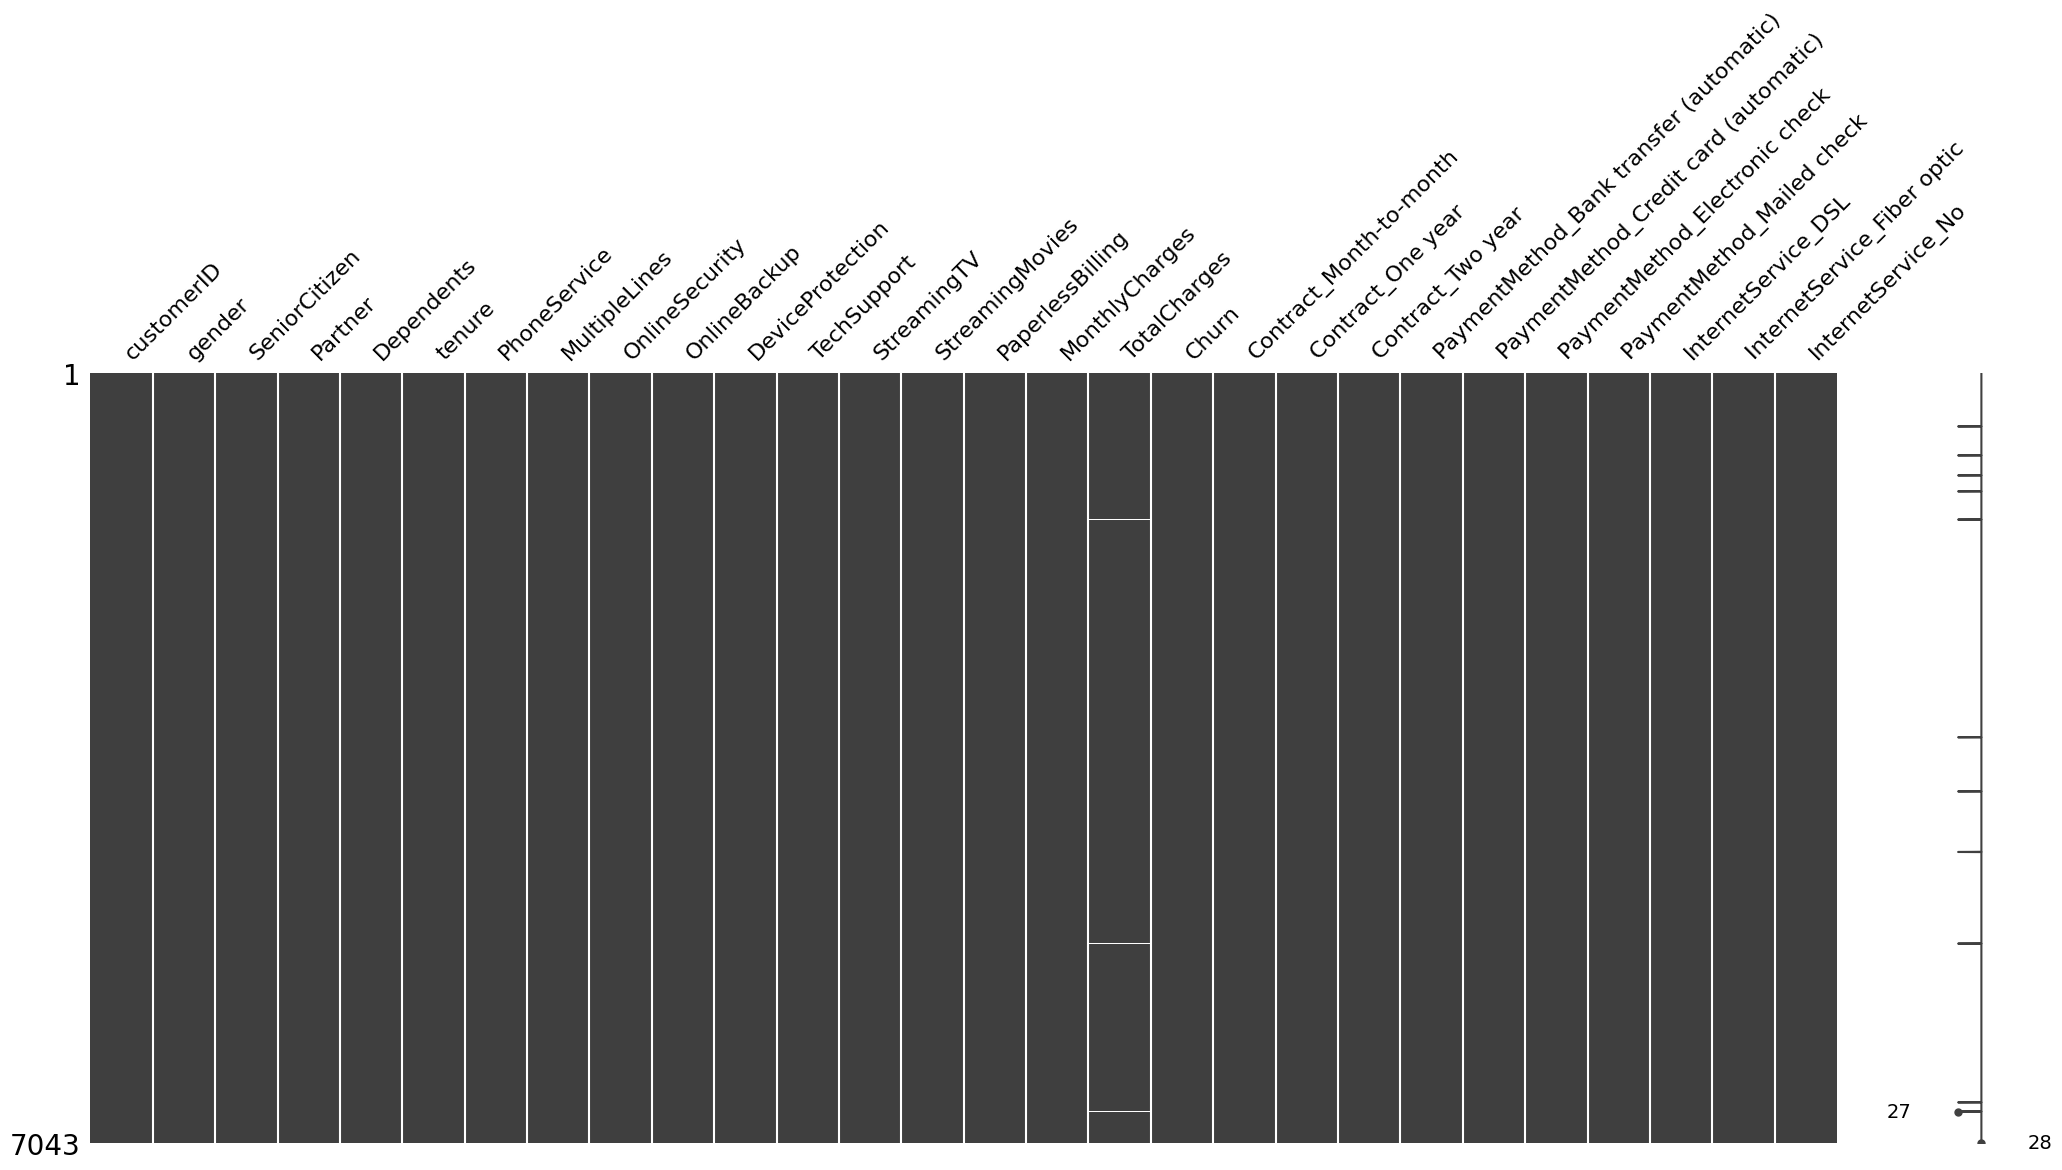

In [ ]:
msno.matrix(df)

In [ ]:
missing_values = df.isnull().any(axis=1).sum() / len(df)
print("Rasio missing values: {:.2%}".format(missing_values))

Rasio missing values: 0.16%


In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
missing_values = df.isnull().any(axis=1).sum() / len(df)
print("Rasio missing values: {:.2%}".format(missing_values))

Rasio missing values: 0.00%


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,0.421928,0.493902,0.00,0.0000,0.000,1.0000,1.00
OnlineSecurity,7032.0,0.286547,0.452180,0.00,0.0000,0.000,1.0000,1.00
OnlineBackup,7032.0,0.344852,0.475354,0.00,0.0000,0.000,1.0000,1.00
DeviceProtection,7032.0,0.343857,0.475028,0.00,0.0000,0.000,1.0000,1.00


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

minmax_scaler = MinMaxScaler()
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[columns_to_scale] = minmax_scaler.fit_transform(df[columns_to_scale])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.0,0.000000,1.000000,1.000000,1.0
SeniorCitizen,7032.0,0.162400,0.368844,0.0,0.000000,0.000000,0.000000,1.0
Partner,7032.0,0.482509,0.499729,0.0,0.000000,0.000000,1.000000,1.0
Dependents,7032.0,0.298493,0.457629,0.0,0.000000,0.000000,1.000000,1.0
tenure,7032.0,0.442560,0.345708,0.0,0.112676,0.394366,0.760563,1.0
PhoneService,7032.0,0.903299,0.295571,0.0,1.000000,1.000000,1.000000,1.0
MultipleLines,7032.0,0.421928,0.493902,0.0,0.000000,0.000000,1.000000,1.0
OnlineSecurity,7032.0,0.286547,0.452180,0.0,0.000000,0.000000,1.000000,1.0
OnlineBackup,7032.0,0.344852,0.475354,0.0,0.000000,0.000000,1.000000,1.0
DeviceProtection,7032.0,0.343857,0.475028,0.0,0.000000,0.000000,1.000000,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   float64
 6   PhoneService                             7032 non-null   int64  
 7   MultipleLines                            7032 non-null   int64  
 8   OnlineSecurity                           7032 non-null   int64  
 9   OnlineBackup                             7032 non-null   int64  
 10  DeviceProtection                         7032 no

In [ ]:
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
churn

26.578498293515356

In [ ]:
df = df[['customerID', 'Churn'] + [col for col in df if col not in ['customerID', 'Churn']]]

train, test = train_test_split(df, test_size=0.2, stratify=df['Churn'], random_state=10)

X_train = train.drop(['customerID', 'Churn'], axis=1)
y_train = train['Churn']

X_test = test.drop(['customerID', 'Churn'], axis=1)
y_test = test['Churn']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [ ]:
train.to_csv('train.csv', index=False)
files.download('train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test.to_csv('test.csv', index=False)
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Model Building**

In [ ]:
from math import sqrt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
# sqrt(5625) = 75
k_values = range(1, 76)

Minimum error: 0.19402985074626866 at K = 53


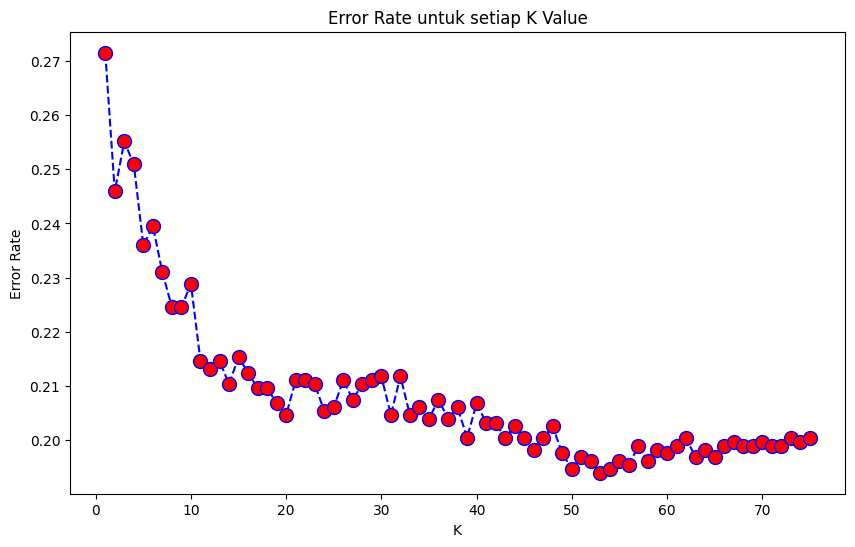

In [ ]:
error_rate = []

for i in k_values:
 knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean', weights='uniform')
 knn.fit(X_train,y_train)

 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(k_values,error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate untuk setiap K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

min_error = min(error_rate)
best_k = error_rate.index(min_error) + 1
print("Minimum error:", min_error, "at K =", best_k)

In [ ]:
from sklearn import neighbors, metrics

train_accuracies, test_accuracies = [], []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_test_pred = model.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
    print(f"{k}, train: {train_accuracy:.3f}, test: {test_accuracy:.3f}")

best_k = k_values[np.argmax(test_accuracies)]

print(f"\nNilai K terbaik adalah {best_k} dengan akurasi: {test_accuracies[np.argmax(test_accuracies)]}")

1, train: 0.997, test: 0.729
2, train: 0.864, test: 0.754
3, train: 0.856, test: 0.745
4, train: 0.834, test: 0.749
5, train: 0.835, test: 0.764
6, train: 0.829, test: 0.760
7, train: 0.823, test: 0.769
8, train: 0.823, test: 0.775
9, train: 0.815, test: 0.775
10, train: 0.814, test: 0.771
11, train: 0.811, test: 0.785
12, train: 0.814, test: 0.787
13, train: 0.807, test: 0.785
14, train: 0.810, test: 0.790
15, train: 0.803, test: 0.785
16, train: 0.808, test: 0.787
17, train: 0.804, test: 0.790
18, train: 0.808, test: 0.790
19, train: 0.802, test: 0.793
20, train: 0.806, test: 0.795
21, train: 0.801, test: 0.789
22, train: 0.806, test: 0.789
23, train: 0.801, test: 0.790
24, train: 0.804, test: 0.795
25, train: 0.802, test: 0.794
26, train: 0.803, test: 0.789
27, train: 0.802, test: 0.792
28, train: 0.802, test: 0.790
29, train: 0.800, test: 0.789
30, train: 0.804, test: 0.788
31, train: 0.799, test: 0.795
32, train: 0.800, test: 0.788
33, train: 0.800, test: 0.795
34, train: 0.800, t

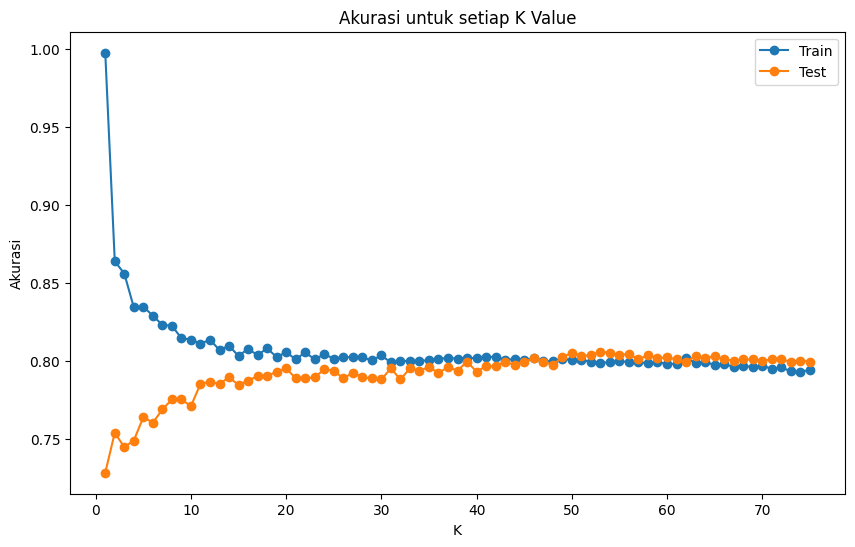

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, '-o', label='Train')
plt.plot(k_values, test_accuracies, '-o', label='Test')
plt.xlabel('K')
plt.ylabel('Akurasi')
plt.title('Akurasi untuk setiap K Value')
plt.legend()
plt.show()

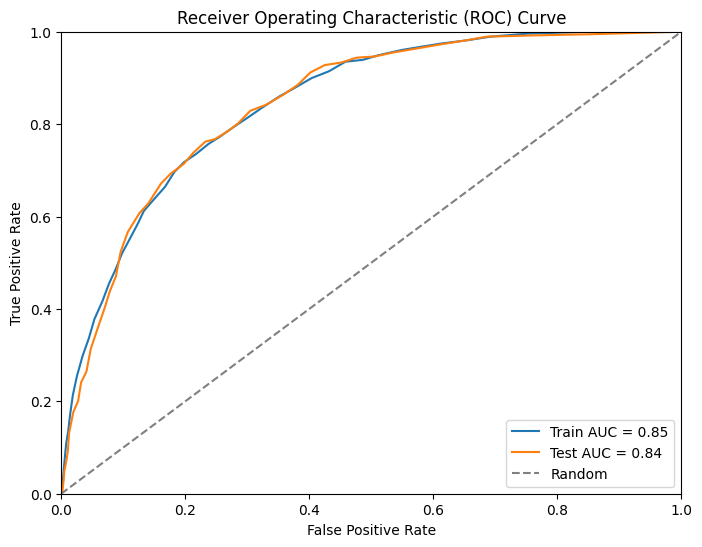

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

model = KNeighborsClassifier(n_neighbors=best_k, weights='uniform', metric='euclidean')
model.fit(X_train, y_train)

y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {train_auc:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors=best_k, weights='uniform', metric='euclidean')
model.fit(X_train, y_train)

choice = input("Pilih opsi (1 untuk Customer ID dari data testing, 2 untuk manual input): ")

if choice == "1":
  customer_id = input("Prediksi churn berdasarkan Customer ID pada data testing: ")
  user_input = test[test['customerID'] == customer_id]

  if user_input.empty:
      print("Customer ID tidak ditemukan.")
  else:
      user_features = user_input.drop(['Churn', 'customerID'], axis=1)
      y_pred = model.predict(user_features)
      print("Predicted Churn:", y_pred)
      y_test = user_input['Churn'].values[[0]]
      print("Test Data Churn:", y_test)

elif choice == "2":
    user_features = []

    for feature_name in df.columns:
        if feature_name not in ['Churn', 'customerID']:
            user_input = input(f"Masukan value untuk {feature_name}: ")
            user_features.append(float(user_input))

    user_features = np.array(user_features).reshape(1, -1)
    y_pred = model.predict(user_features)

    print("Predicted Churn:", y_pred)
else:
    print("Gagal. Pilih 1 untuk menggunakan Customer ID dari data testing atau 2 untuk manual input.")